### Load The Tweets Dataset 

In [70]:
import numpy as np
import pandas as pd
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

pd.set_option("display.max_colwidth", 200)

In [71]:
data = pd.read_pickle("cleaned_tweets.pkl")
data.head(10)

,label,cleaned_tweets_incl_SW,cleaned_tweets_SW_removed,cleaned_tweets_SW_removed_len_gt2
0,0,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone
1,0,finally a transparant silicon case thanks to my uncle yay sony xperia s sonyexperias,finally transparant silicon case thanks uncle yay sony xperia sonyexperias,finally transparant silicon case thanks uncle yay sony xperia sonyexperias
2,0,we love this would you go talk makememories unplug relax iphone smartphone wifi connect,love talk makememories unplug relax iphone smartphone wifi connect,love talk makememories unplug relax iphone smartphone wifi connect
3,0,i am wired i know i am george i wa made that way iphone cute daventry home,wired know george way iphone cute daventry home,wired know george way iphone cute daventry home
4,1,what amazing service apple will not even talk to me about a question i have unless i pay them for their stupid support,amazing service apple talk question unless pay stupid support,amazing service apple talk question unless pay stupid support
5,1,iphone software update fucked up my phone big time stupid iphones,iphone software update fucked phone big time stupid iphones,iphone software update fucked big time stupid iphones
6,0,happy for u instapic instadaily u sony xperia xperiaz,happy instapic instadaily sony xperia xperiaz,happy instapic instadaily sony xperia xperiaz
7,0,new type c charger cable uk bay amazon etsy new year rob cross toby young evemun mcmafia taylor spectre newyear starting recipe technology samsunggalaxys iphonex pic twitter com pjiwq wtc,new type c charger cable uk bay amazon etsy new year rob cross toby young evemun mcmafia taylor spectre newyear starting recipe technology samsunggalaxys iphonex pic twitter com pjiwq wtc,new type charger cable bay amazon etsy new year rob cross toby young evemun mcmafia taylor spectre newyear starting recipe technology samsunggalaxys iphonex
8,0,bout to go shopping again listening to music iphone justme music likeforlike followforfollow,bout shopping listening music iphone justme music likeforlike followforfollow,bout shopping listening music iphone justme music likeforlike followforfollow
9,0,photo fun selfie pool water sony camera picoftheday sun instagood boy cute outdoor,photo fun selfie pool water sony camera picoftheday sun instagood boy cute outdoor,photo fun selfie pool water sony camera picoftheday sun instagood boy cute outdoor


In [73]:
data.to_pickle("whatevername.pkl")

In [6]:
# 0 refers to positive sentiment, 1 is negative sentiment

# ML Model for Sentiment analysis

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import make_pipeline, Pipeline

In [61]:
X = data['cleaned_tweets_SW_removed_len_gt2']
y = data['label']

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

CV = CountVectorizer(min_df=10, max_features=1000)
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)

CV_pipe = Pipeline([('CV', CV) , ('LR', LR1)] )

results = cross_val_score(CV_pipe, X, y, cv=kfold, scoring='accuracy')
print(np.round((results.mean())*100, 2), np.round((results.std())*100, 2)) 

CV_pipe.fit(X,y)
len(CV_pipe['CV'].vocabulary_) 

86.31 1.37


1000

In [74]:
test_tweeet = ["amazing service apple talk question unless pay stupid support"]
CV_pipe.predict(test_tweeet)

array([1])

In [75]:
pwd

'/home/DataHour/Sentiment Analysis Project'

In [67]:
import pickle
with open(r'LR_Pipeline.pickle', 'wb') as handle:
	pickle.dump(CV_pipe, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [76]:
with open(r'LR_Pipeline.pickle', 'rb') as handle:
    LR_pipeline = pickle.load(handle)

In [77]:
LR_pipeline.predict(test_tweeet)

array([1])

# Simple Deep Learning Model with OHE (Binary) Features

In [26]:
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import ModelCheckpoint
import pydot
import keras.backend as K

In [8]:
# This user-defined function return a Deep Learning Model

def define_model(n_words):
    # define network
    model = Sequential()
    model.add(Dense(64, input_shape=(n_words,), activation='relu', kernel_regularizer='l2'))
#     model.add(Dropout(0.25))
    model.add(Dense(32, activation='relu', kernel_regularizer='l2'))
#     model.add(Dropout(0.25))
    model.add(Dense(1, activation='sigmoid'))
    
    # compile network
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # summarize defined model
    model.summary()    
    plot_model(model, to_file='model1.png', show_shapes=True)
    return model

In [10]:
# fit a tokenizer
from keras.preprocessing.text import Tokenizer
def create_tokenizer(lines):
    tokenizer = Tokenizer() # num_words=1000
    tokenizer.fit_on_texts(lines)
    return tokenizer

In [13]:
# create the tokenizer
train_docs = data['cleaned_tweets_SW_removed_len_gt2']
tokenizer = create_tokenizer(train_docs)

In [14]:
# encode data
X = tokenizer.texts_to_matrix(train_docs, mode='binary')

In [ ]:
import pickle
with open(r'tokenizer.pickle', 'wb') as handle:
	pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [15]:
X.shape

(7920, 13634)

In [16]:
X[0]

array([0., 1., 0., ..., 0., 0., 0.])

In [17]:
y = data['label']

In [18]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,  test_size=0.2,random_state=42) 

In [19]:
Xtrain.shape, Xtest.shape

((6336, 13634), (1584, 13634))

In [31]:
# define network
K.clear_session() 
n_words = Xtrain.shape[1]
model = define_model(n_words)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                872640    
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 874,753
Trainable params: 874,753
Non-trainable params: 0
_________________________________________________________________


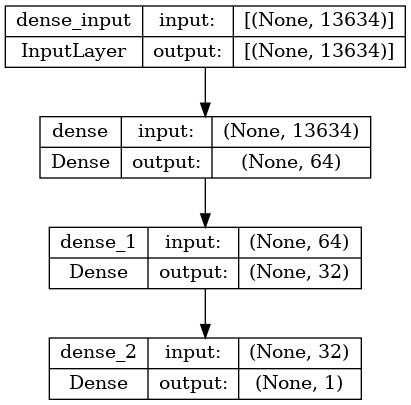

In [21]:
# fit network
checkpoint = ModelCheckpoint("BestModel.h5",
                             monitor="val_loss", 
                             mode="min",
                             save_best_only = True,
                             verbose=1)
callbacks = [checkpoint]

h = model.fit(Xtrain, ytrain, validation_split=0.1, callbacks = callbacks, batch_size=180, epochs=25, verbose=2)

Epoch 1/25

Epoch 1: val_loss improved from inf to 0.83498, saving model to BestModel.h5
32/32 - 5s - loss: 1.2330 - accuracy: 0.7417 - val_loss: 0.8350 - val_accuracy: 0.7587 - 5s/epoch - 159ms/step
Epoch 2/25

Epoch 2: val_loss improved from 0.83498 to 0.64735, saving model to BestModel.h5
32/32 - 1s - loss: 0.7255 - accuracy: 0.7994 - val_loss: 0.6474 - val_accuracy: 0.8486 - 660ms/epoch - 21ms/step
Epoch 3/25

Epoch 3: val_loss improved from 0.64735 to 0.56369, saving model to BestModel.h5
32/32 - 1s - loss: 0.5991 - accuracy: 0.8522 - val_loss: 0.5637 - val_accuracy: 0.8502 - 648ms/epoch - 20ms/step
Epoch 4/25

Epoch 4: val_loss improved from 0.56369 to 0.50893, saving model to BestModel.h5
32/32 - 1s - loss: 0.5283 - accuracy: 0.8711 - val_loss: 0.5089 - val_accuracy: 0.8596 - 658ms/epoch - 21ms/step
Epoch 5/25

Epoch 5: val_loss improved from 0.50893 to 0.47385, saving model to BestModel.h5
32/32 - 1s - loss: 0.4799 - accuracy: 0.8772 - val_loss: 0.4738 - val_accuracy: 0.8565 - 

Text(0, 0.5, 'Loss Fn valaues')

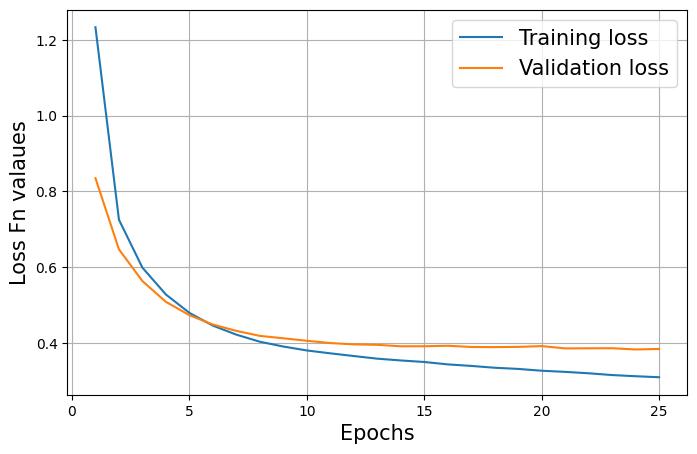

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(list(range(1,26)), h.history['loss'], label='Training loss')
plt.plot(list(range(1,26)), h.history['val_loss'], label='Validation loss')
plt.legend(fontsize=15)
plt.grid()
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Loss Fn valaues', fontsize=15)

Text(0, 0.5, 'Accuracy')

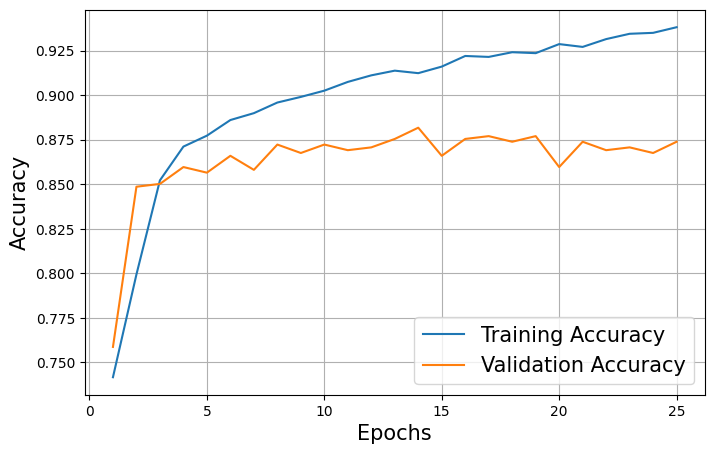

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(list(range(1,26)), h.history['accuracy'], label='Training Accuracy')
plt.plot(list(range(1,26)), h.history['val_accuracy'], label='Validation Accuracy')
plt.legend(fontsize=15)
plt.grid()
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)

In [24]:
# evaluate the model ONCe on the test set
loss, acc = model.evaluate(Xtest, ytest, verbose=0)
print('Test Accuracy: %f' % (acc*100))

Test Accuracy: 88.320708


In [53]:
test_tweeet = ["amazing service apple talk question unless pay stupid support"]
#test_tweeet = ["love talk makememories unplug relax iphone smartphone wifi connect"]
test_tweeet_vec = tokenizer.texts_to_matrix(test_tweeet, mode='binary')
test_tweeet_vec.shape

(1, 13634)

In [55]:
import keras
best_model = keras.models.load_model('BestModel.h5')

In [56]:
prediction = best_model.predict(test_tweeet_vec)
predicted_label = np.argmax(prediction)
round(prediction[0][0]), predicted_label

1/1 [==============================] - 0s 26ms/step


(1, 0)

1/1 [==============================] - 0s 28ms/step


(array([[0.01563886]], dtype=float32), 0)

In [57]:
pwd

'/home/DataHour/Sentiment Analysis Project'